In [1]:
#importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
df = pd.read_csv("Summary_of_Weather.csv", low_memory=False)
df.shape

(119040, 31)

In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# data cleaning
weather = df.loc[ : , ["STA","Date","MeanTemp"] ]
weather

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444
...,...,...,...
119035,82506,1945-12-27,23.333333
119036,82506,1945-12-28,23.888889
119037,82506,1945-12-29,23.333333
119038,82506,1945-12-30,23.333333


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


 The closest weather station to this war is BINDUKURI weather station Id i.e weather.STA is 32907

In [6]:
# change the datatype of Date to datetime from object type
weather_bin = weather.loc[weather.STA == 32907]
print(weather_bin.info())
print("---------------------------------------------------")
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
print(weather_bin.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       751 non-null    int64  
 1   Date      751 non-null    object 
 2   MeanTemp  751 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.5+ KB
None
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       751 non-null    int64         
 1   Date      751 non-null    datetime64[ns]
 2   MeanTemp  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.5 KB
None


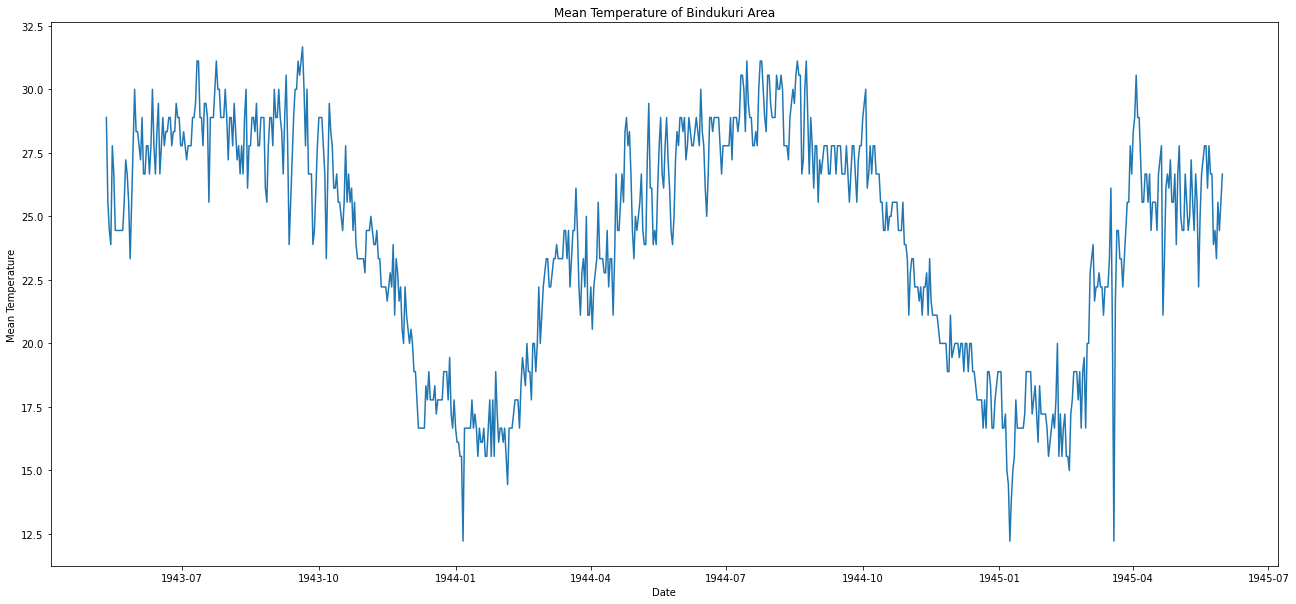

In [7]:
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show();

#### To check for the stationary of the time series:
  1) Plotting Rolling Statistics
  2) Augumented Dickey-Fuller Test

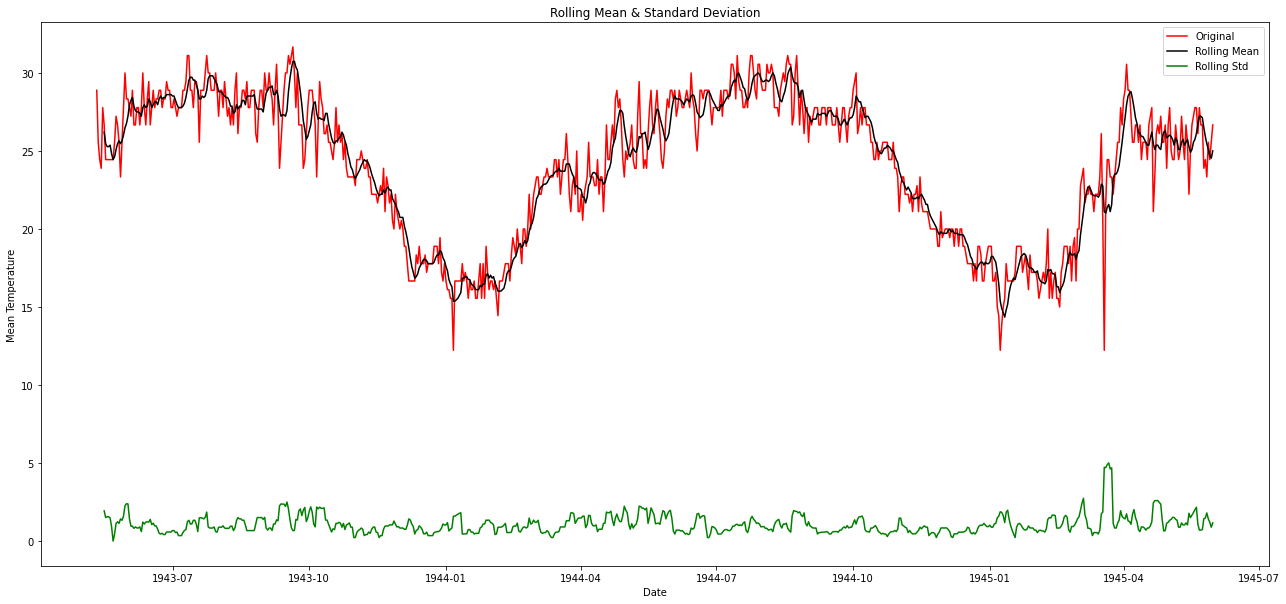

Test statistic:  -1.4095966745887751
p value 0.5776668028526358
Critical values {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [8]:
from statsmodels.tsa.stattools import adfuller

def cal_adfuller(ts):
    #Dickey Fuller test
    result=adfuller(ts)
    print("Test statistic: ",result[0])
    print("p value",result[1])
    print("Critical values",result[4])
    
def plotting_rolling_stats(ts):
    #Rolling statistics
    rolmean=ts.rolling(6).mean() # 6 is the window size
    rolstd=ts.rolling(6).std()
    
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    
# lets create time series from weather 
timeSeries = weather_bin.loc[ : , ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


# check stationary: mean, variance(std) and adfuller test
plotting_rolling_stats(ts)  
## plotting the rolling mean and rolling std of the ts

cal_adfuller(ts.MeanTemp)    ## doing ADF test

### Observation

1. Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (not stationary)

2. Second one is constant variance. It looks like constant, as we see very low changes in variance. (yes stationary)

3. Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (not stationary)

**As a result, we are sure that our time series is not stationary.**

## Making a Time Series Stationary 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train = pd.read_csv('AirPassengers.csv')
train.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
train.shape

(144, 2)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
train.timestamp = pd.to_datetime(train.Month)
train.index = train.timestamp
train.drop('Month',axis = 1, inplace = True)

In [14]:
train.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


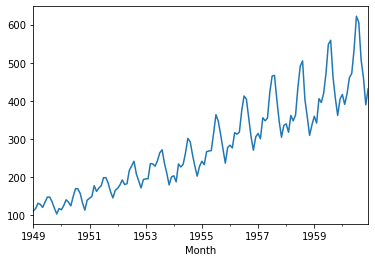

In [15]:
train['#Passengers'].plot();

 Visual Observation : This series is not stationary.

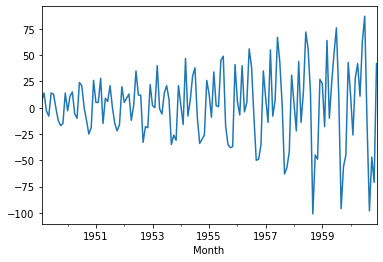

In [20]:
#Apply Differencing
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)

train['#Passengers_diff'].dropna().plot();

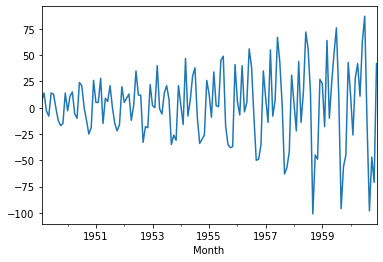

In [21]:
#Apply Sesonal Differencing

n=7;
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)

train['#Passengers_diff'].dropna().plot();

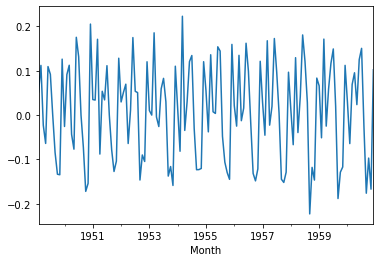

In [22]:
#Apply Transformation
train['#Passengers_log'] = np.log(train['#Passengers'])

train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)

train['#Passengers_log_diff'].dropna().plot();

 As we can see, this plot is a significant improvement over the previous plots.